In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

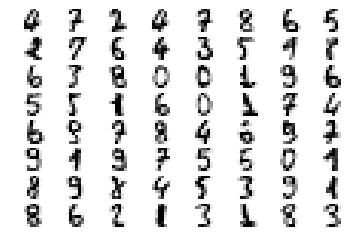

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [74]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [75]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [76]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)
#number_of_sampling = 100

list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend([li])

class1 = [0, 2, 4, 6, 8]
class2 = []

class1_indexes = []
class2_indexes = []

for i in numbers:
    if i in class1:
        class1_indexes.extend(digits_indexes[i])
    else:
        class2_indexes.extend(digits_indexes[i])
        class2.append(i)

class1_label = [1] * len(class1_indexes)
class2_label = [0] * len(class2_indexes)

print("number of class1:{}".format(len(class1_label)))
print("number of class2:{}".format(len(class2_label)))

samplesize = 1617
x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
x_outputs = [tuple([c]) for c in class1_label + class2_label]

number of class1:803
number of class2:814


In [77]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 100)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")
[stats, winner] = run(config_path)


 ****** Running generation 0 ****** 

Population's average fitness: 0.50000 stdev: 0.07556
Best fitness: 0.72418 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.228
Mean genetic distance 2.961, standard deviation 0.499
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.241 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52777 stdev: 0.08123
Best fitness: 0.72418 - size: (2, 13) - species 7 - id 35
Average adjusted fitness: 0.286
Mean genetic distance 3.063, standard deviation 0.498
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.986 sec (6.613 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55481 stdev: 0.08415
Best fitness: 0.72480 - size: (3, 16) - species 8 - id 464
Average adjusted fitness: 0.280
Mean genetic distance 3.077, standard deviation 0.484
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.872 sec (6.366 aver

Population's average fitness: 0.66241 stdev: 0.12018
Best fitness: 0.82251 - size: (7, 21) - species 32 - id 1774
Average adjusted fitness: 0.437
Mean genetic distance 3.141, standard deviation 0.472
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.431 sec (7.305 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68047 stdev: 0.10810
Best fitness: 0.82251 - size: (7, 21) - species 32 - id 1774
Average adjusted fitness: 0.279
Mean genetic distance 3.161, standard deviation 0.464
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.374 sec (7.451 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67281 stdev: 0.11319
Best fitness: 0.82313 - size: (8, 23) - species 32 - id 3569
Average adjusted fitness: 0.294
Mean genetic distance 3.157, standard deviation 0.474
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.371 sec (7.389 average)

 ******

Population's average fitness: 0.67881 stdev: 0.12364
Best fitness: 0.82746 - size: (6, 19) - species 7 - id 6157
Average adjusted fitness: 0.459
Mean genetic distance 3.293, standard deviation 0.536
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.318 sec (8.031 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66545 stdev: 0.11788
Best fitness: 0.82746 - size: (6, 19) - species 7 - id 6157
Average adjusted fitness: 0.231
Mean genetic distance 3.304, standard deviation 0.538
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 8.022 sec (8.054 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.68097 stdev: 0.11345
Best fitness: 0.82746 - size: (6, 19) - species 7 - id 6157
Average adjusted fitness: 0.230
Mean genetic distance 3.296, standard deviation 0.557
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 8.360 sec (8.108 average)

 ****** Ru

Population's average fitness: 0.69124 stdev: 0.11417
Best fitness: 0.83735 - size: (8, 24) - species 7 - id 10603
Average adjusted fitness: 0.236
Mean genetic distance 3.085, standard deviation 0.527
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.282 sec (10.938 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67284 stdev: 0.12421
Best fitness: 0.83735 - size: (8, 24) - species 7 - id 10603
Average adjusted fitness: 0.256
Mean genetic distance 3.081, standard deviation 0.548
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 9.507 sec (10.616 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.68917 stdev: 0.12279
Best fitness: 0.83735 - size: (8, 24) - species 7 - id 10603
Average adjusted fitness: 0.411
Mean genetic distance 3.070, standard deviation 0.557
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 9.615 sec (10.466 average)

 ***

Population's average fitness: 0.68622 stdev: 0.12112
Best fitness: 0.83797 - size: (12, 31) - species 43 - id 14479
Average adjusted fitness: 0.242
Mean genetic distance 3.058, standard deviation 0.547
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 9.973 sec (10.054 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.69758 stdev: 0.11661
Best fitness: 0.83797 - size: (11, 29) - species 43 - id 12292
Average adjusted fitness: 0.304
Mean genetic distance 3.081, standard deviation 0.523
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 10.245 sec (10.172 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.68704 stdev: 0.12912
Best fitness: 0.83797 - size: (11, 29) - species 43 - id 12292
Average adjusted fitness: 0.392
Mean genetic distance 3.095, standard deviation 0.561
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 10.154 sec (10.291 averag

In [97]:
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

In [89]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend([li])

#for i in digits_indexes:
#    print(len(i))

In [93]:
class1_indexes = []
class2_indexes = []

for i in numbers:
    if i in class1:
        class1_indexes.extend(digits_indexes[i])
    else:
        class2_indexes.extend(digits_indexes[i])
        class2.append(i)

class1_label = [1] * len(class1_indexes)
class2_label = [0] * len(class2_indexes)

print("number of class1:{}".format(len(class1_label)))
print("number of class2:{}".format(len(class2_label)))

testsamplesize = 180
test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

number of class1:88
number of class2:92


In [98]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
# the index of maximum in each line
pred_outputs = np.argmax(px_outputs, axis = 1)
real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

acc = np.sum(pred_outputs == real_outputs)/testsamplesize
print("Accuracy: {}".format(acc))

Accuracy: 0.8055555555555556


In [101]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 10)

    return [stats, winner]

In [103]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    

    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [104]:
class1 = [0, 2, 4, 6, 8]
winner1 = get_winner(class1)

number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.49682 stdev: 0.07872
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.236
Mean genetic distance 2.896, standard deviation 0.477
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.506 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54627 stdev: 0.06900
Best fitness: 0.76747 - size: (3, 15) - species 1 - id 273
Average adjusted fitness: 0.273
Mean genetic distance 3.003, standard deviation 0.495
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 6.696 sec (6.601 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55438 stdev: 0.07638
Best fitness: 0.80643 - size: (4, 17) - species 17 - id 532
Average adjusted fitness: 0.230
Mean genetic distance 3.020, standard deviation 0.479
Population of 195 members in 32 species
Total extinctio

In [99]:
winner_list = []
classes = [[0,2,4,6,8],[0,4,5,8,9],[1,3,4,6,9],[1,2,3,6,7,8,9],[1,4,5,6,7],[1,3,5,7,8],[0,3,4,7,8],[1,2,3,4,5],[0,2,5,7,9],[1,2,5,6,8],[1,2,4,7,9],[0,6,7],[0,2,3],[1,8,9],[0,2,3,4,5,6,7,8,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

In [105]:
len(classes)

15